<a href="https://colab.research.google.com/github/doissegundos/Quebrando_Captcha_Seguranca/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Processamento de imagem
## Este trabalho utiliza o dataset que contém imagens de captchas de segurança com caracteres de letras e numeros.
Disponivel em: https://www.kaggle.com/fournierp/captcha-version-2-images

By: Adna

In [128]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd


### Importando as imagens salvas no google drive

In [201]:
#Para acessar as imagens do Drive
from google.colab import drive
drive.mount('/content/drive')
root_path = 'drive/My Drive/dataset_new' 

image_dataset_train = np.load(os.path.join(r'drive/My Drive/datasets/captcha', 'datatrain.npy'))
image_dataset_teste = np.load(os.path.join(r'drive/My Drive/datasets/captcha', 'datatest.npy'))
image_dataset_valid = np.load(os.path.join(r'drive/My Drive/datasets/captcha', 'datavalid.npy'))

label_images_train = np.load(os.path.join(r'drive/My Drive/datasets/captcha', 'labeltrain.npy'))
label_images_teste = np.load(os.path.join(r'drive/My Drive/datasets/captcha', 'labeltest.npy'))
label_images_valid = np.load(os.path.join(r'drive/My Drive/datasets/captcha', 'labelvalid.npy'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Visualizando as imagens

mmg38


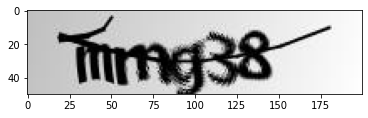

In [202]:
plt.imshow(image_dataset_train[0])
print(label_images_train[0])

ndyfe


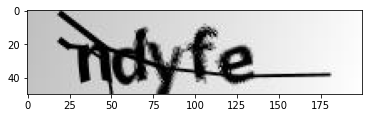

In [203]:
plt.imshow(image_dataset_valid[0])
print(label_images_valid[0])

mm3nn


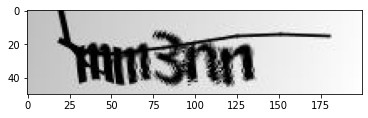

In [204]:
plt.imshow(image_dataset_teste[0])
print(label_images_teste[0])

### Limialização 
#### O processo de limiarização consiste na transformação de uma imagem em escala de cinza para uma imagem binária. A limiarização mais simples é a definida por um **limite** predefinido, onde tudo que for menor que esse limite é transformado para um valor, e maior que ele para outro valor.

<function matplotlib.pyplot.show>

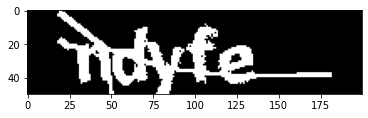

In [205]:
#Normaliza a imagem de float32 para uint8
image = cv2.normalize(image_dataset_valid[0], None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

#Converte a imagem para a escala de cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Binaliza a imagem
binary = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,75,10)

#Vizualiza a imagem binalizada
plt.imshow(binary, cmap='gray')
plt.show

#### O processo de binarização deve ser realizado para todas as imagens do dataset

In [206]:
def binariza(dataset):
  dataset_aux = []
  for i in range(len(dataset)):
    #Normaliza a imagem de float32 para uint8
    image = cv2.normalize(dataset[i], None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    #Converte a imagem para a escala de cinza
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #Binaliza a imagem
    binary = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,75,10)

    dataset_aux.append(binary)
  
  dataset_aux = np.array(dataset_aux)  
  return dataset_aux

In [207]:
image_dataset_valid = binariza(image_dataset_valid)
image_dataset_teste = binariza(image_dataset_teste)
image_dataset_train = binariza(image_dataset_train)

c8fxy


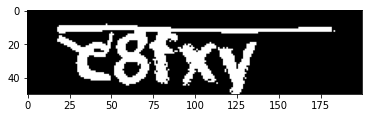

In [208]:
plt.imshow(image_dataset_valid[100], cmap='gray')
print(label_images_valid[100])

### Segmentação

#### Cada captcha contém contém 5 caracteres que podem ser letras ou numeros. Logo, se faz necessária a segmentação dos caracteres.

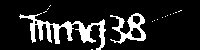

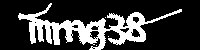

In [209]:
# É necessario utilizar a operação de erosão para remover as linhas em cima dos captchas
kernel =np.ones((3,2),np.uint8)
erosion =	cv2.erode(image_dataset_train[0],	kernel,	iterations	= 1)
cv2_imshow(erosion)
cv2_imshow(image_dataset_train[0])

In [210]:
kernel =np.ones((3,2),np.uint8)
elementoEstruturante	=	cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

borderType = cv2.BORDER_CONSTANT
def pad(src): 
  top = int(0.05 * src.shape[0])  # shape[0] = rows
  bottom = top     
  left = int(0.15 * src.shape[1])  # shape[1] = cols
  right = left
  des=cv2.copyMakeBorder(src, top, bottom, left+1, right, borderType, None,255)
  return cv2.bitwise_not(des)

def digitos(dataset,label_dataset):
  t = []
  digito,label_digito = [],[]
  for j in range(len(dataset)):

    erosion =	cv2.erode(dataset[j],	kernel,	iterations	= 1)
    for i in range(5):
      digito.append(pad(erosion[:,(30+23*i):(30+23*(i+1))]))
      label_digito.append(label_dataset[j][i])
  return digito,label_digito



In [211]:
dataset_train,label_train = digitos(image_dataset_train,label_images_train)
dataset_valid,label_valid = digitos(image_dataset_valid,label_images_valid)
dataset_teste,label_teste = digitos(image_dataset_teste,label_images_teste)

In [213]:
# Convertendo de lista para numpy
dataset_train = np.array(dataset_train)
dataset_valid = np.array(dataset_valid)
dataset_teste = np.array(dataset_teste)

2


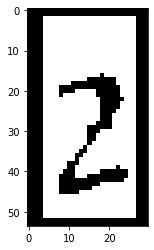

In [214]:
# Digito segmentado
plt.imshow(dataset_train[101], cmap='gray')
print(label_train[101])

# CNN

#### Categorização

Os digitos disponiveis no dataset são:
  - 2	3	4	5	6	7	8	b	c	d	e	f	g	m	n	p	w	x	y
  
Será necessário ultilizar o one hot enconder para categorizar esses digitos

In [215]:
cat=pd.get_dummies(label_train)
cat

,2,3,4,5,6,7,8,b,c,d,e,f,g,m,n,p,w,x,y
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3117,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [216]:
label_train=np.array(pd.get_dummies(label_train).to_numpy())
label_teste=np.array(pd.get_dummies(label_teste).to_numpy())
label_valid=np.array(pd.get_dummies(label_valid).to_numpy())

In [217]:
label_train.dtype

dtype('uint8')

#### MODELO

In [189]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
from google.colab import drive
import os
from keras.utils import np_utils
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Activation, ZeroPadding2D,Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import losses
from tensorflow.keras.layers import Conv2DTranspose
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.python.keras.layers.advanced_activations import LeakyReLU


In [259]:
def cnn():
  modelo = Sequential()
  modelo.add(Conv2D(32, kernel_size=(3,3), input_shape=(54,30,1), activation='relu', padding="same"))
  modelo.add(Conv2D(32, kernel_size=(3,3),activation='relu', padding="same"))
  modelo.add(BatchNormalization(axis=-1))
  modelo.add(MaxPooling2D((2,2), strides=(2,2)))   

  modelo.add(Conv2D(64, kernel_size=(3,3),activation='relu', padding="same"))
  modelo.add(Conv2D(64, kernel_size=(3,3),activation='relu', padding="same"))
  modelo.add(BatchNormalization(axis=-1))
  modelo.add(MaxPooling2D((2,2), strides=(2,2)))

  modelo.add(Conv2D(128, kernel_size=(3,3),activation='relu', padding="same"))
  modelo.add(Conv2D(128, kernel_size=(3,3),activation='relu', padding="same"))
  modelo.add(BatchNormalization(axis=-1))
  modelo.add(MaxPooling2D((2,2), strides=(2,2)))

  modelo.add(Conv2D(256, kernel_size=(3,3),activation='relu', padding="same"))
  modelo.add(Conv2D(256, kernel_size=(3,3),activation='relu', padding="same"))
  modelo.add(BatchNormalization(axis=-1))
  modelo.add(MaxPooling2D((2,2), strides=(2,2)))

  modelo.add(Flatten())

  modelo.add(Dense(512, activation='relu'))
  modelo.add(Dropout(0.2)) 
  modelo.add(Dense(19, activation="softmax"))
  modelo.compile(loss='categorical_crossentropy', optimizer=Adam(0.0002,0.5), metrics=['accuracy'])

  return modelo

In [255]:
def treinamento():
  num_classes = 19
  label_dataset_train = np_utils.to_categorical(label_train,num_classes)
  label_dataset_valid = np_utils.to_categorical(label_valid,num_classes)

  gen_train = ImageDataGenerator(rotation_range=1, width_shift_range=0.08, shear_range=0.3,height_shift_range=0.08, zoom_range=0.08, vertical_flip = True,horizontal_flip = True)
  gen_valid = ImageDataGenerator() 

  image_dataset_train_gen = gen_train.flow(dataset_train, label_dataset_train, batch_size=64)
  image_dataset_valid_gen = gen_valid.flow(dataset_valid, label_dataset_valid, batch_size=64)

  checkpoint = ModelCheckpoint(r'drive/My Drive/datasets/captcha/modelos/CNN.h5', monitor='val_loss', verbose=1, mode='min', save_best_only=True)
  early_stop = EarlyStopping(monitor='val_loss',min_delta=0.001,patience=50,mode='min',verbose=1)

  modelo = cnn()
  modelo.fit_generator(image_dataset_train_gen, steps_per_epoch=len(image_dataset_train)//64, epochs=1000, 
                    validation_data=(dataset_valid,label_valid), validation_steps=len(image_dataset_valid)//64, callbacks=[checkpoint, early_stop])


In [262]:
def treinamento():
  num_classes = 19
  label_dataset_train = np_utils.to_categorical(label_train,num_classes)
  label_dataset_valid = np_utils.to_categorical(label_valid,num_classes)



  checkpoint = ModelCheckpoint(r'drive/My Drive/datasets/captcha/modelos/CNN.h5', monitor='val_loss', verbose=1, mode='min', save_best_only=True)
  early_stop = EarlyStopping(monitor='val_loss',min_delta=0.001,patience=50,mode='min',verbose=1)

  modelo = cnn()
  modelo.fit(dataset_train,label_train, epochs=1000, 
                    validation_data=(dataset_valid,label_valid), callbacks=[checkpoint, early_stop])


In [263]:
treinamento()

Epoch 1/1000


ValueError: ignored